Analyzing recent movie ratings data to determine whether there has been 
any change in Fandango's rating system after Hickey's analysis to determine
whenter Fandango's rating system has corrected its bias.
https://fivethirtyeight.com/features/fandango-movies-ratings/
https://github.com/fivethirtyeight/data/blob/master/fandango/README.md.

In [62]:
import pandas as pd
fsc = pd.read_csv('fandango_score_comparison.csv')
mr_67 = pd.read_csv('movie_ratings_16_17.csv')
fsc['year'] = fsc['FILM'].str.split(' ').str[-1].str.strip('(').str.strip(')').str.strip('')
fsc['year'] = pd.to_numeric(fsc['year'])
before = fsc[['year', 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after = mr_67[['year', 'movie','fandango']]
print(before['year'].value_counts())
print(after['year'].value_counts())

2015    129
2014     17
Name: year, dtype: int64
2016    191
2017     23
Name: year, dtype: int64


In [63]:
before = before[before['year']==2015]
after = after[after['year']==2016]
print(before.head(3))
print(after.head(3))

   year                            FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  2015  Avengers: Age of Ultron (2015)             5.0                   4.5   
1  2015               Cinderella (2015)             5.0                   4.5   
2  2015                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
   year                movie  fandango
0  2016  10 Cloverfield Lane       3.5
1  2016             13 Hours       4.5
2  2016  A Cure for Wellness       3.0


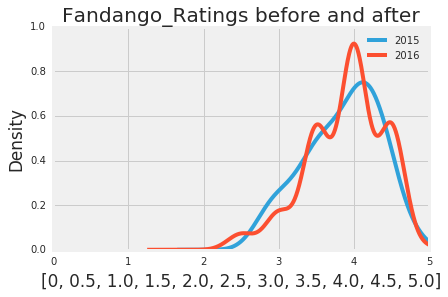

In [104]:
% matplotlib inline
import matplotlib.pyplot as plt
before['Fandango_Ratingvalue'].plot.kde()
after['fandango'].plot.kde(title='Fandango_Ratings before and after')
plt.xlim(0,5)
plt.xlabel([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(['2015', '2016'],  loc='best')
plt.style.use('fivethirtyeight')

In [79]:
print(before['Fandango_Ratingvalue'].value_counts())
print(after['fandango'].value_counts())

4.1    13
3.9    12
4.2    11
4.3     9
4.5     9
3.6     8
3.7     8
4.4     7
3.4     7
4.0     7
3.5     6
3.2     4
2.9     4
3.3     4
3.8     4
3.0     4
3.1     3
4.8     3
2.8     2
4.6     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64
4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64


In [113]:
before_mean = before['Fandango_Ratingvalue'].mean()
after_mean = after['fandango'].mean()
before_median = before['Fandango_Ratingvalue'].median()
after_median = after['fandango'].median()
before_mode = before['Fandango_Ratingvalue'].mode()[0]
after_mode = after['fandango'].mode()[0]

In [114]:
summary = pd.DataFrame()
summary['2015'] = [before_mean, before_median, before_mode]
summary['2016'] = [after_mean, after_median, after_mode]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,3.846512,3.887435
median,3.900000,4.000000
mode,4.100000,4.000000


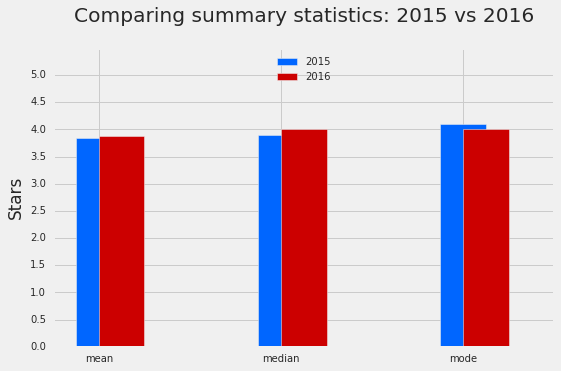

In [120]:
import numpy as np
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Based on 2015 and 2016 data, it doesn' tlook like the bia was corrected since the patterns between 2015 an 2016 are similar